# Exploratory Data Analysis
In this notebook, we'll explore the [Human Resources Data Set](https://rpubs.com/rhuebner/hrd_cb_v14) and perform some data cleaning, preprocessing, and feature selection. 

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
pd.set_option("display.max_columns", None)

## Read Data

In [2]:
# Load the CSV file
df = pd.read_csv('../data/raw/HRDataset_v14.csv')

# Display the first few rows of the dataset
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

## Features Distribution

As the model paper (https://www.mdpi.com/2076-3417/14/8/3254), we will draw the distribution of the following features: 
- Department
- Recruitment source
- HispanicLatino
- Sex

Additionally, we must visualize the class distribution to identify class imbalance. 


In [4]:
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

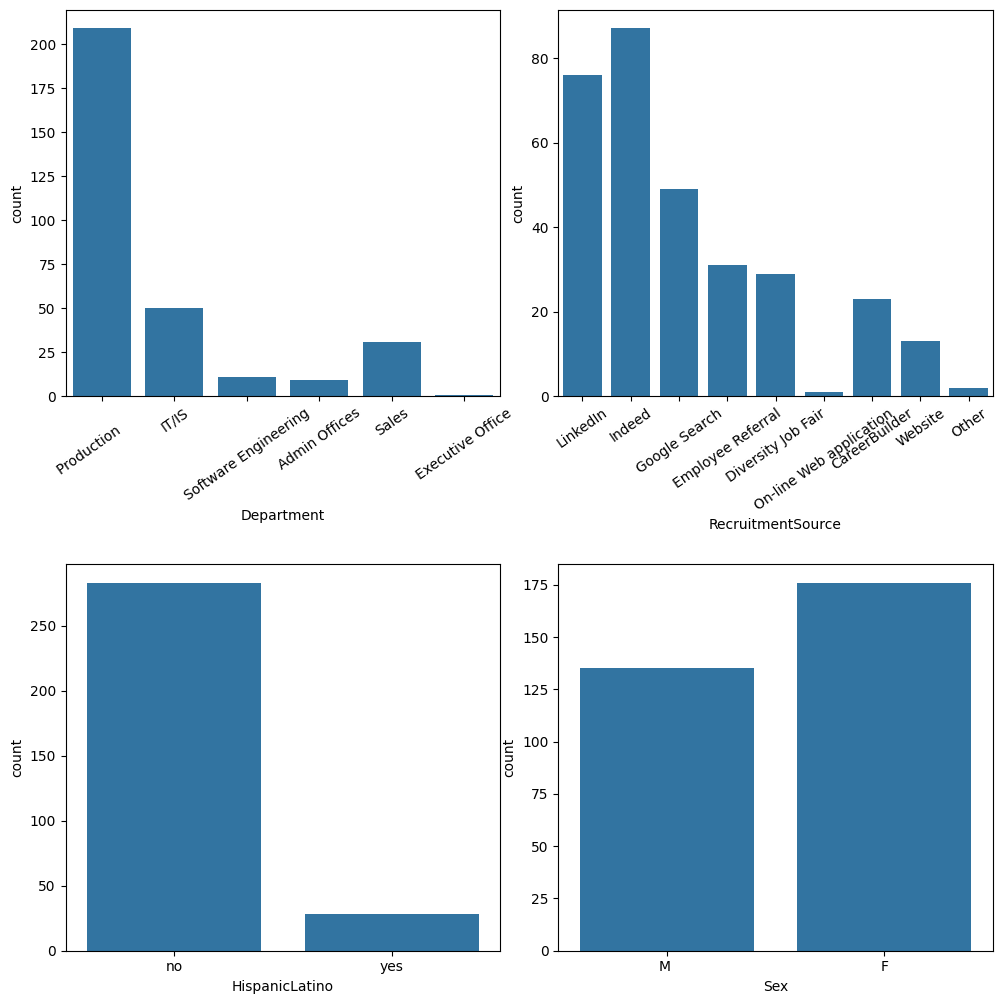

In [6]:
cls_to_vis = [['Department', 'RecruitmentSource'], 
              ['HispanicLatino', 'Sex']]

df['HispanicLatino'] = df['HispanicLatino'].str.lower()

# Generically define how many plots along and across
ncols = 2
nrows = 2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))
fig.tight_layout(h_pad=10)

# Lazy counter so we can remove unwated axes
counter = 0
for i in range(nrows):
    for j in range(ncols):

        ax = axes[i][j]
        # ax.bar(df[cls_to_vis[i][j]])
        sns.countplot(ax=ax, x=cls_to_vis[i][j], data=df)
        if i == 0:
            plt.setp(ax.get_xticklabels(), rotation=35)


        counter += 1

plt.show()

In [7]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values[missing_values > 0])

Missing values:
 DateofTermination    207
ManagerID              8
dtype: int64


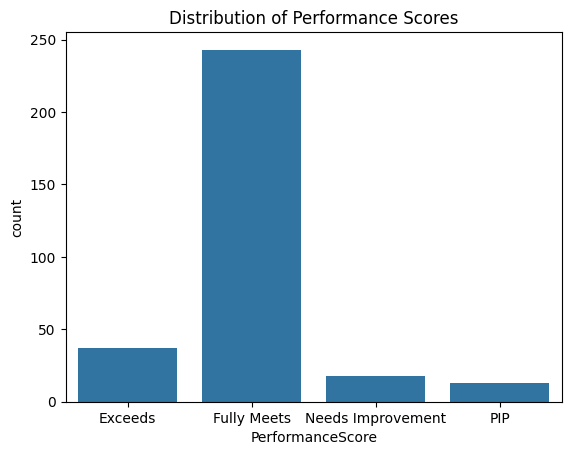

In [8]:
# Visualize the distribution of the performance scores
sns.countplot(x='PerformanceScore', data=df)
plt.title('Distribution of Performance Scores')
plt.show()

## EDA

## Remove Redundant Features

In [9]:
print(df.ManagerID.nunique())
print(df.ManagerName.nunique())

23
21


In [10]:
# unique combinations of 'ManagerName' and 'ManagerID'ArithmeticError
df.groupby(['ManagerName','ManagerID']).size().reset_index().rename(columns={0:'count'})

,ManagerName,ManagerID,count
0,Alex Sweetwater,10.0,9
1,Amy Dunn,11.0,21
2,Board of Directors,9.0,2
3,Brandon R. LeBlanc,1.0,6
4,Brandon R. LeBlanc,3.0,1
5,Brannon Miller,12.0,22
6,Brian Champaigne,13.0,8
7,David Stanley,14.0,21
8,Debra Houlihan,15.0,3
9,Elijiah Gray,16.0,22


Each of the managers 'Brandon R. LeBlanc' and 'Michael Albert' have two different redundant ID's!!

In [11]:
# unique combinations of 'HispanicLatino' and 'RaceDesc'ArithmeticError
df.groupby(['HispanicLatino','RaceDesc']).size().reset_index().rename(columns={0:'count'})

,HispanicLatino,RaceDesc,count
0,no,American Indian or Alaska Native,3
1,no,Asian,29
2,no,Black or African American,72
3,no,Two or more races,10
4,no,White,169
5,yes,Black or African American,8
6,yes,Hispanic,1
7,yes,Two or more races,1
8,yes,White,18


We can see that the columns 'HispanicLatino' and 'RaceDesc' are a bit different, so we'll keep both.

In [12]:
# remove redundant columns
# TODO: save the values mapping 
cls_to_drop = [
    'Employee_Name',                # EmpID (index)
    'MarriedID', 'MaritalStatusID', # MaritalDesc 
    'DeptID',                       # Department
    'ManagerID',                    # ManagerName
    'PerformanceScore',             # PerfScoreID (label)
    'Sex',                          # GenderID
    'EmpStatusID',                  # EmploymentStatus
]

In [13]:
df.drop(columns=cls_to_drop, inplace=True)
df.head()

,EmpID,GenderID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,RecruitmentSource,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,10026,1,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,Single,US Citizen,no,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,LinkedIn,4.60,5,0,1/17/2019,0,1
1,10084,1,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,Married,US Citizen,no,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,Indeed,4.96,3,6,2/24/2016,0,17
2,10196,0,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,Married,US Citizen,no,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,LinkedIn,3.02,3,0,5/15/2012,0,3
3,10088,0,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,Married,US Citizen,no,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,Indeed,4.84,5,0,1/3/2019,0,15
4,10069,0,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,Divorced,US Citizen,no,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,Google Search,5.00,4,0,2/1/2016,0,2


In [14]:
df['EmpID'].is_unique

True

In [15]:
df.set_index('EmpID', inplace=True)

## Data Cleaning

### Convert all string columns to lowercase 

In [16]:
df['Position'].dtype == 'O'

True

In [17]:
for col in df.columns: 
    # if the column type is "Object"
    if df[col].dtype == 'O':
        df[col] = df[col].str.lower()

df.head()

,GenderID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,RecruitmentSource,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
EmpID,,,,,,,,,,,,,,,,,,,,,,,,,,,
10026,1,4,0,62506,0,19,production technician i,ma,1960,07/10/83,single,us citizen,no,white,7/5/2011,NaN,n/a-stillemployed,active,production,michael albert,linkedin,4.60,5,0,1/17/2019,0,1
10084,1,3,0,104437,1,27,sr. dba,ma,2148,05/05/75,married,us citizen,no,white,3/30/2015,6/16/2016,career change,voluntarily terminated,it/is,simon roup,indeed,4.96,3,6,2/24/2016,0,17
10196,0,3,0,64955,1,20,production technician ii,ma,1810,09/19/88,married,us citizen,no,white,7/5/2011,9/24/2012,hours,voluntarily terminated,production,kissy sullivan,linkedin,3.02,3,0,5/15/2012,0,3
10088,0,3,0,64991,0,19,production technician i,ma,1886,09/27/88,married,us citizen,no,white,1/7/2008,NaN,n/a-stillemployed,active,production,elijiah gray,indeed,4.84,5,0,1/3/2019,0,15
10069,0,3,0,50825,1,19,production technician i,ma,2169,09/08/89,divorced,us citizen,no,white,7/11/2011,9/6/2016,return to school,voluntarily terminated,production,webster butler,google search,5.00,4,0,2/1/2016,0,2


### Position

In [18]:
df['Position'].unique()

array(['production technician i', 'sr. dba', 'production technician ii',
       'software engineer', 'it support', 'data analyst',
       'database administrator', 'enterprise architect', 'sr. accountant',
       'production manager', 'accountant i', 'area sales manager',
       'software engineering manager', 'bi director',
       'director of operations', 'sr. network engineer', 'sales manager',
       'bi developer', 'it manager - support', 'network engineer',
       'it director', 'director of sales', 'administrative assistant',
       'president & ceo', 'senior bi developer',
       'shared services manager', 'it manager - infra',
       'principal data architect', 'data architect', 'it manager - db',
       'data analyst ', 'cio'], dtype=object)

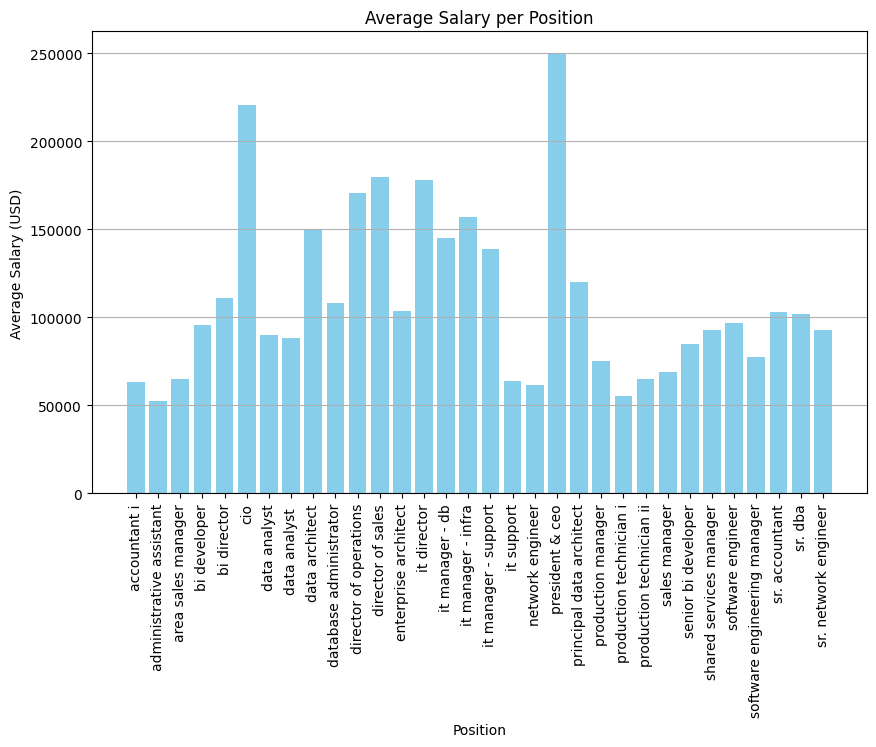

In [19]:
# average salary per position
# Calculate average salary per position
avg_salary = df.groupby('Position')['Salary'].mean().reset_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(avg_salary['Position'], avg_salary['Salary'], color='skyblue')

# Adding titles and labels
plt.title('Average Salary per Position')
plt.xlabel('Position')
plt.ylabel('Average Salary (USD)')

# Show the plot
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

In [20]:
# categorize position to managerial vs non-managerial
def position_to_managerial(pos):
    keywords = ['cio', 'ceo', 'director', 'manager']
    for keyword in keywords:
        if keyword in pos: 
            return 1
    return 0

In [21]:
df['Managerial'] = df['Position'].apply(position_to_managerial)

In [22]:
df['Managerial'].value_counts()

Managerial
0    255
1     56
Name: count, dtype: int64

In [23]:
# let's check on the ceo
df[df['Position'].str.contains('ceo')]

,GenderID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,RecruitmentSource,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Managerial
EmpID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10089,0,3,0,250000,0,16,president & ceo,ma,1902,09/21/54,married,us citizen,yes,white,7/2/2012,NaN,n/a-stillemployed,active,executive office,board of directors,indeed,4.83,3,0,1/17/2019,0,10,1


In [24]:
print(df['PositionID'].nunique())
print(df['Position'].nunique())

30
32


In [25]:
# unique combinations of 'PositionID' and 'Position'ArithmeticError
df.groupby(['PositionID','Position']).size().reset_index().rename(columns={0:'count'})

,PositionID,Position,count
0,1,accountant i,3
1,2,administrative assistant,3
2,3,area sales manager,27
3,4,bi developer,4
4,5,bi director,1
5,6,cio,1
6,7,data architect,1
7,8,database administrator,5
8,9,data analyst,7
9,9,data analyst,1


Notice how the positions 'data analyst', 'production manager' and 'software engineer' have multiple ID's 

I guess we'll have to drop 'PositionID' column

In [26]:
df.drop(columns=['PositionID'], inplace=True)

Note: we can add a feature "NumberOfPeers" to indicate the number of employees with the same position, and remove the position column

In [27]:
df['Position'].value_counts()

Position
production technician i         137
production technician ii         57
area sales manager               27
production manager               14
software engineer                10
it support                        8
data analyst                      7
sr. network engineer              5
database administrator            5
network engineer                  5
bi developer                      4
senior bi developer               3
administrative assistant          3
sales manager                     3
accountant i                      3
sr. dba                           2
it manager - db                   2
sr. accountant                    2
director of operations            1
shared services manager           1
data analyst                      1
data architect                    1
principal data architect          1
it manager - infra                1
president & ceo                   1
enterprise architect              1
bi director                       1
director of sales  

### State and Zip

In [28]:
df.head()

,GenderID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,Position,State,Zip,DOB,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,RecruitmentSource,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Managerial
EmpID,,,,,,,,,,,,,,,,,,,,,,,,,,,
10026,1,4,0,62506,0,production technician i,ma,1960,07/10/83,single,us citizen,no,white,7/5/2011,NaN,n/a-stillemployed,active,production,michael albert,linkedin,4.60,5,0,1/17/2019,0,1,0
10084,1,3,0,104437,1,sr. dba,ma,2148,05/05/75,married,us citizen,no,white,3/30/2015,6/16/2016,career change,voluntarily terminated,it/is,simon roup,indeed,4.96,3,6,2/24/2016,0,17,0
10196,0,3,0,64955,1,production technician ii,ma,1810,09/19/88,married,us citizen,no,white,7/5/2011,9/24/2012,hours,voluntarily terminated,production,kissy sullivan,linkedin,3.02,3,0,5/15/2012,0,3,0
10088,0,3,0,64991,0,production technician i,ma,1886,09/27/88,married,us citizen,no,white,1/7/2008,NaN,n/a-stillemployed,active,production,elijiah gray,indeed,4.84,5,0,1/3/2019,0,15,0
10069,0,3,0,50825,1,production technician i,ma,2169,09/08/89,divorced,us citizen,no,white,7/11/2011,9/6/2016,return to school,voluntarily terminated,production,webster butler,google search,5.00,4,0,2/1/2016,0,2,0


In [29]:
df['State'].value_counts()

State
ma    276
ct      6
tx      3
vt      2
ut      1
az      1
nd      1
or      1
mt      1
nv      1
id      1
ky      1
nc      1
fl      1
ga      1
co      1
ny      1
pa      1
ri      1
nh      1
tn      1
in      1
oh      1
ca      1
wa      1
al      1
va      1
me      1
Name: count, dtype: int64

Since the state MA is dominant, we could have a feature to reflect whether the employee is in MA or not.

In [30]:
df.loc[df['State'] != 'ma', 'State'] = 'other'

We'll keep the Zip for now, although it will most probably be removed later. 

### Date columns

In [32]:
df.head()

,GenderID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,Position,State,Zip,DOB,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,RecruitmentSource,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Managerial
EmpID,,,,,,,,,,,,,,,,,,,,,,,,,,,
10026,1,4,0,62506,0,production technician i,ma,1960,07/10/83,single,us citizen,no,white,7/5/2011,NaN,n/a-stillemployed,active,production,michael albert,linkedin,4.60,5,0,1/17/2019,0,1,0
10084,1,3,0,104437,1,sr. dba,ma,2148,05/05/75,married,us citizen,no,white,3/30/2015,6/16/2016,career change,voluntarily terminated,it/is,simon roup,indeed,4.96,3,6,2/24/2016,0,17,0
10196,0,3,0,64955,1,production technician ii,ma,1810,09/19/88,married,us citizen,no,white,7/5/2011,9/24/2012,hours,voluntarily terminated,production,kissy sullivan,linkedin,3.02,3,0,5/15/2012,0,3,0
10088,0,3,0,64991,0,production technician i,ma,1886,09/27/88,married,us citizen,no,white,1/7/2008,NaN,n/a-stillemployed,active,production,elijiah gray,indeed,4.84,5,0,1/3/2019,0,15,0
10069,0,3,0,50825,1,production technician i,ma,2169,09/08/89,divorced,us citizen,no,white,7/11/2011,9/6/2016,return to school,voluntarily terminated,production,webster butler,google search,5.00,4,0,2/1/2016,0,2,0


#### DOB

In [33]:
df['DOB']

EmpID
10026    07/10/83
10084    05/05/75
10196    09/19/88
10088    09/27/88
10069    09/08/89
           ...   
10135    05/11/85
10301    05/04/82
10010    08/30/79
10043    02/24/79
10271    08/17/78
Name: DOB, Length: 311, dtype: object

In [34]:
pd.to_datetime(df['DOB'], format='%m/%d/%y')

EmpID
10026   1983-07-10
10084   1975-05-05
10196   1988-09-19
10088   1988-09-27
10069   1989-09-08
           ...    
10135   1985-05-11
10301   1982-05-04
10010   1979-08-30
10043   1979-02-24
10271   1978-08-17
Name: DOB, Length: 311, dtype: datetime64[ns]

In [35]:
df['DOB'] = pd.to_datetime(df['DOB'], format='%m/%d/%y')

#### DateofHire

In [36]:
df['DateofHire']

EmpID
10026     7/5/2011
10084    3/30/2015
10196     7/5/2011
10088     1/7/2008
10069    7/11/2011
           ...    
10135     7/7/2014
10301     9/2/2008
10010    4/10/2010
10043    3/30/2015
10271    9/29/2014
Name: DateofHire, Length: 311, dtype: object

In [37]:
df['DateofHire'] = pd.to_datetime(df['DateofHire'], format='%m/%d/%Y')

#### DateofTermination

In [38]:
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'], format='%m/%d/%Y')
df['DateofTermination']

EmpID
10026          NaT
10084   2016-06-16
10196   2012-09-24
10088          NaT
10069   2016-09-06
           ...    
10135          NaT
10301   2015-09-29
10010          NaT
10043          NaT
10271          NaT
Name: DateofTermination, Length: 311, dtype: datetime64[ns]

#### LastPerformanceReview_Date

In [39]:
df['LastPerformanceReview_Date'] = pd.to_datetime(df['LastPerformanceReview_Date'], format='%m/%d/%Y')
df['LastPerformanceReview_Date']

EmpID
10026   2019-01-17
10084   2016-02-24
10196   2012-05-15
10088   2019-01-03
10069   2016-02-01
           ...    
10135   2019-02-28
10301   2015-09-02
10010   2019-02-21
10043   2019-02-01
10271   2019-01-30
Name: LastPerformanceReview_Date, Length: 311, dtype: datetime64[ns]

In [40]:
df['LastPerformanceReview_Date'].sort_values(ascending=False)

EmpID
10135   2019-02-28
10029   2019-02-28
10220   2019-02-27
10294   2019-02-27
10003   2019-02-27
           ...    
10230   2011-10-22
10269   2011-05-04
10300   2011-03-06
10204   2011-02-06
10268   2010-07-14
Name: LastPerformanceReview_Date, Length: 311, dtype: datetime64[ns]

We can use the difference between this date and the DOB to get the age of the employee at the time of the performance evaluation. 

### Terminated employees

Note: When we think of how to apply the model in practice, it will be used to predict the performance score of either new joiners or existing employees. 

In [41]:
df['TermReason'].value_counts()

TermReason
n/a-stillemployed                   207
another position                     20
unhappy                              14
more money                           11
career change                         9
hours                                 8
attendance                            7
return to school                      5
relocation out of area                5
no-call, no-show                      4
military                              4
retiring                              4
performance                           4
maternity leave - did not return      3
medical issues                        3
learned that he is a gangster         1
fatal attraction                      1
gross misconduct                      1
Name: count, dtype: int64

Maybe we can categorize employees to active and terminated. Then build a model for each category? 

Set termination reason to None for activate employees

In [42]:
df.loc[df['TermReason'].str.contains('n/a')]

,GenderID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,Position,State,Zip,DOB,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,RecruitmentSource,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Managerial
EmpID,,,,,,,,,,,,,,,,,,,,,,,,,,,
10026,1,4,0,62506,0,production technician i,ma,1960,1983-07-10,single,us citizen,no,white,2011-07-05,NaT,n/a-stillemployed,active,production,michael albert,linkedin,4.60,5,0,2019-01-17,0,1,0
10088,0,3,0,64991,0,production technician i,ma,1886,1988-09-27,married,us citizen,no,white,2008-01-07,NaT,n/a-stillemployed,active,production,elijiah gray,indeed,4.84,5,0,2019-01-03,0,15,0
10002,0,4,0,57568,0,production technician i,ma,1844,1977-05-22,single,us citizen,no,white,2012-01-09,NaT,n/a-stillemployed,active,production,amy dunn,linkedin,5.00,5,0,2019-01-07,0,15,0
10194,0,3,0,95660,0,software engineer,ma,2110,1979-05-24,single,us citizen,no,white,2014-11-10,NaT,n/a-stillemployed,active,software engineering,alex sweetwater,linkedin,3.04,3,4,2019-01-02,0,19,0
10062,1,3,0,59365,0,production technician i,ma,2199,1983-02-18,widowed,us citizen,no,white,2013-09-30,NaT,n/a-stillemployed,active,production,ketsia liebig,employee referral,5.00,4,0,2019-02-25,0,19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10174,0,3,0,60446,0,production technician ii,ma,2302,1985-04-20,single,us citizen,no,white,2014-09-29,NaT,n/a-stillemployed,active,production,david stanley,linkedin,3.40,4,0,2019-02-21,0,14,0
10135,1,3,0,65893,0,production technician ii,ma,1810,1985-05-11,single,us citizen,no,white,2014-07-07,NaT,n/a-stillemployed,active,production,kissy sullivan,linkedin,4.07,4,0,2019-02-28,0,13,0
10010,0,4,0,220450,0,cio,ma,2067,1979-08-30,single,us citizen,no,white,2010-04-10,NaT,n/a-stillemployed,active,it/is,janet king,employee referral,4.60,5,6,2019-02-21,0,16,1


In [43]:

df.loc[df['TermReason'].str.contains('n/a'), 'TermReason'] = None

## Correlation (numeric columns)

In [44]:
df.head()

,GenderID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,Position,State,Zip,DOB,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,RecruitmentSource,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Managerial
EmpID,,,,,,,,,,,,,,,,,,,,,,,,,,,
10026,1,4,0,62506,0,production technician i,ma,1960,1983-07-10,single,us citizen,no,white,2011-07-05,NaT,None,active,production,michael albert,linkedin,4.60,5,0,2019-01-17,0,1,0
10084,1,3,0,104437,1,sr. dba,ma,2148,1975-05-05,married,us citizen,no,white,2015-03-30,2016-06-16,career change,voluntarily terminated,it/is,simon roup,indeed,4.96,3,6,2016-02-24,0,17,0
10196,0,3,0,64955,1,production technician ii,ma,1810,1988-09-19,married,us citizen,no,white,2011-07-05,2012-09-24,hours,voluntarily terminated,production,kissy sullivan,linkedin,3.02,3,0,2012-05-15,0,3,0
10088,0,3,0,64991,0,production technician i,ma,1886,1988-09-27,married,us citizen,no,white,2008-01-07,NaT,None,active,production,elijiah gray,indeed,4.84,5,0,2019-01-03,0,15,0
10069,0,3,0,50825,1,production technician i,ma,2169,1989-09-08,divorced,us citizen,no,white,2011-07-11,2016-09-06,return to school,voluntarily terminated,production,webster butler,google search,5.00,4,0,2016-02-01,0,2,0


In [45]:
numerical_cols = [
    'GenderID',
    'PerfScoreID',
    'FromDiversityJobFairID',
    'Salary',
    'Termd',
    'EngagementSurvey',
    'EmpSatisfaction',
    'SpecialProjectsCount'
]

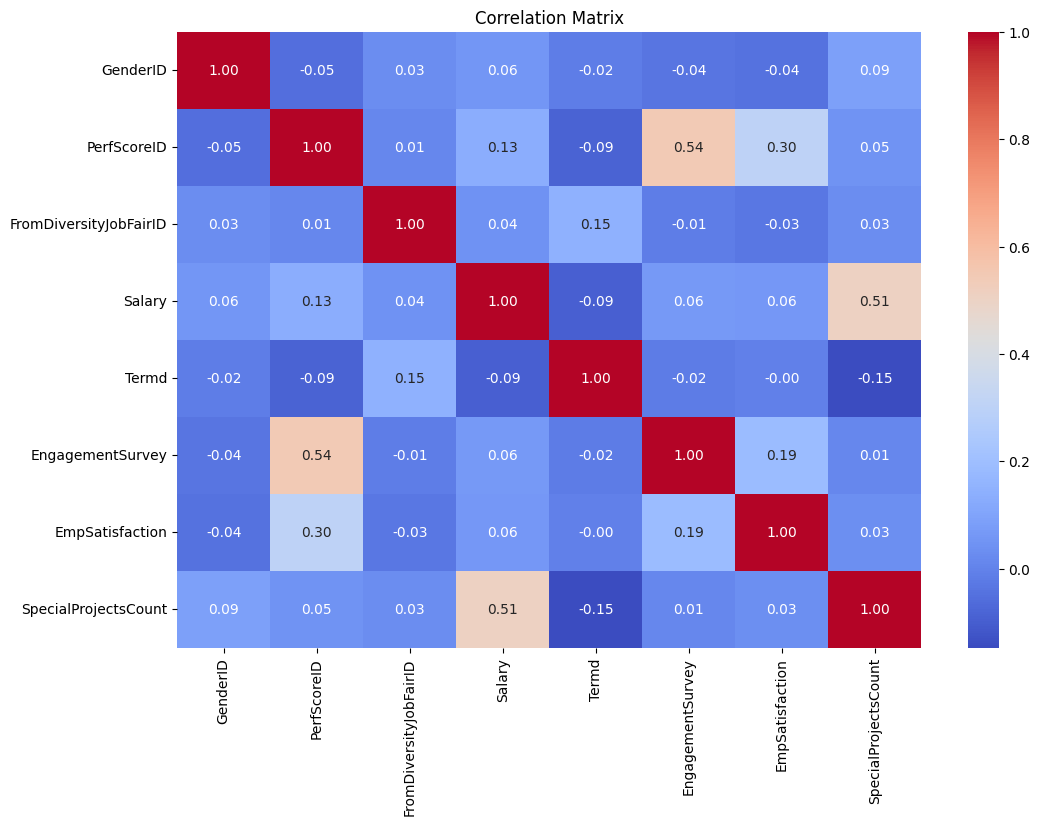

In [46]:
# Visualizing correlations
# TODO: re-visualize the correlation matrix after one-hot-encoding
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Handle Unique Values

In [138]:
df.sample(5)

,GenderID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,Position,State,Zip,DOB,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,RecruitmentSource,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Managerial
EmpID,,,,,,,,,,,,,,,,,,,,,,,,,,,
10306,1,1,0,61568,0,area sales manager,other,36006,11/02/75,single,us citizen,no,two or more races,2014-09-29,NaT,None,active,sales,john smith,indeed,1.93,3,0,2019-01-30,6,5,1
10057,0,3,0,52057,0,production technician i,ma,2122,10/22/75,married,us citizen,no,black or african american,2015-02-16,NaT,None,active,production,elijiah gray,website,5.00,3,0,2019-01-23,0,6,0
10076,0,3,0,55315,0,production technician ii,ma,2149,05/21/87,single,us citizen,no,black or african american,2015-03-30,NaT,None,active,production,ketsia liebig,linkedin,5.00,5,0,2019-02-07,0,16,0
10175,1,3,0,74312,1,production manager,ma,1901,03/10/70,single,us citizen,no,asian,2013-09-30,2014-08-07,retiring,voluntarily terminated,production,janet king,indeed,3.39,3,0,2014-02-20,0,14,1
10011,0,4,0,46738,0,production technician i,ma,2171,01/12/73,married,us citizen,no,asian,2011-11-28,NaT,None,active,production,webster butler,google search,4.36,5,0,2019-02-11,0,16,0


In [47]:
df['RaceDesc'].value_counts()

RaceDesc
white                               187
black or african american            80
asian                                29
two or more races                    11
american indian or alaska native      3
hispanic                              1
Name: count, dtype: int64

To avoid sparse columns, I suggest setting the last three values to 'other'. This will result in a minor data loss. 

In [48]:
df.loc[(df['RaceDesc'].str.contains('two or more races')) | \
       (df['RaceDesc'].str.contains('american indian or alaska native')) | \
        (df['RaceDesc'].str.contains('hispanic')), 'RaceDesc'] = None

In [49]:
df['RecruitmentSource'].value_counts()

RecruitmentSource
indeed                     87
linkedin                   76
google search              49
employee referral          31
diversity job fair         29
careerbuilder              23
website                    13
other                       2
on-line web application     1
Name: count, dtype: int64

The recruitment source "on-line web application" will be added to "other" since it has only one occurrence.

In [50]:
df.loc[df['RecruitmentSource'].str.contains('on-line web application'), 'RecruitmentSource'] = 'other'
df['RecruitmentSource'].value_counts()

RecruitmentSource
indeed                87
linkedin              76
google search         49
employee referral     31
diversity job fair    29
careerbuilder         23
website               13
other                  3
Name: count, dtype: int64

In [51]:
categorical_cols = [
    'Position',
    'State',
    'MaritalDesc',
    'CitizenDesc',
    'HispanicLatino',
    'RaceDesc'

]

In [52]:
df.head()

,GenderID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,Position,State,Zip,DOB,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,RecruitmentSource,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Managerial
EmpID,,,,,,,,,,,,,,,,,,,,,,,,,,,
10026,1,4,0,62506,0,production technician i,ma,1960,1983-07-10,single,us citizen,no,white,2011-07-05,NaT,None,active,production,michael albert,linkedin,4.60,5,0,2019-01-17,0,1,0
10084,1,3,0,104437,1,sr. dba,ma,2148,1975-05-05,married,us citizen,no,white,2015-03-30,2016-06-16,career change,voluntarily terminated,it/is,simon roup,indeed,4.96,3,6,2016-02-24,0,17,0
10196,0,3,0,64955,1,production technician ii,ma,1810,1988-09-19,married,us citizen,no,white,2011-07-05,2012-09-24,hours,voluntarily terminated,production,kissy sullivan,linkedin,3.02,3,0,2012-05-15,0,3,0
10088,0,3,0,64991,0,production technician i,ma,1886,1988-09-27,married,us citizen,no,white,2008-01-07,NaT,None,active,production,elijiah gray,indeed,4.84,5,0,2019-01-03,0,15,0
10069,0,3,0,50825,1,production technician i,ma,2169,1989-09-08,divorced,us citizen,no,white,2011-07-11,2016-09-06,return to school,voluntarily terminated,production,webster butler,google search,5.00,4,0,2016-02-01,0,2,0


In [53]:
# checkpoint
df.to_csv('../data/processed/HRDataset_p_v1.csv')